In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("census2000-1.csv")  # Replace with your actual file path


In [4]:
# Map sex codes to readable labels
df["SexLabel"] = df["Sex"].map({1: "Male", 2: "Female"})

# Create 5-year age group labels (e.g., 0-4, 5-9, ..., 90+)
df["AgeGroup"] = df["Age"].astype(str) + "-" + (df["Age"] + 4).astype(str)
df.loc[df["Age"] >= 90, "AgeGroup"] = "90+"

In [5]:
# Group by AgeGroup, SexLabel, and Year + pivot
grouped = df.groupby(["AgeGroup", "SexLabel", "Year"])["People"].sum().reset_index()

In [6]:
# Pivot the table to wide format
pivot = grouped.pivot_table(index=["AgeGroup", "SexLabel"], columns="Year", values="People").fillna(0).reset_index()

# Add numerical age sorting to preserve correct order
pivot["AgeSort"] = pivot["AgeGroup"].apply(lambda x: int(x.split("-")[0].replace("+", "")))
pivot = pivot.sort_values("AgeSort")

In [7]:
# Split into male and female subsets
males = pivot[pivot["SexLabel"] == "Male"]
females = pivot[pivot["SexLabel"] == "Female"]

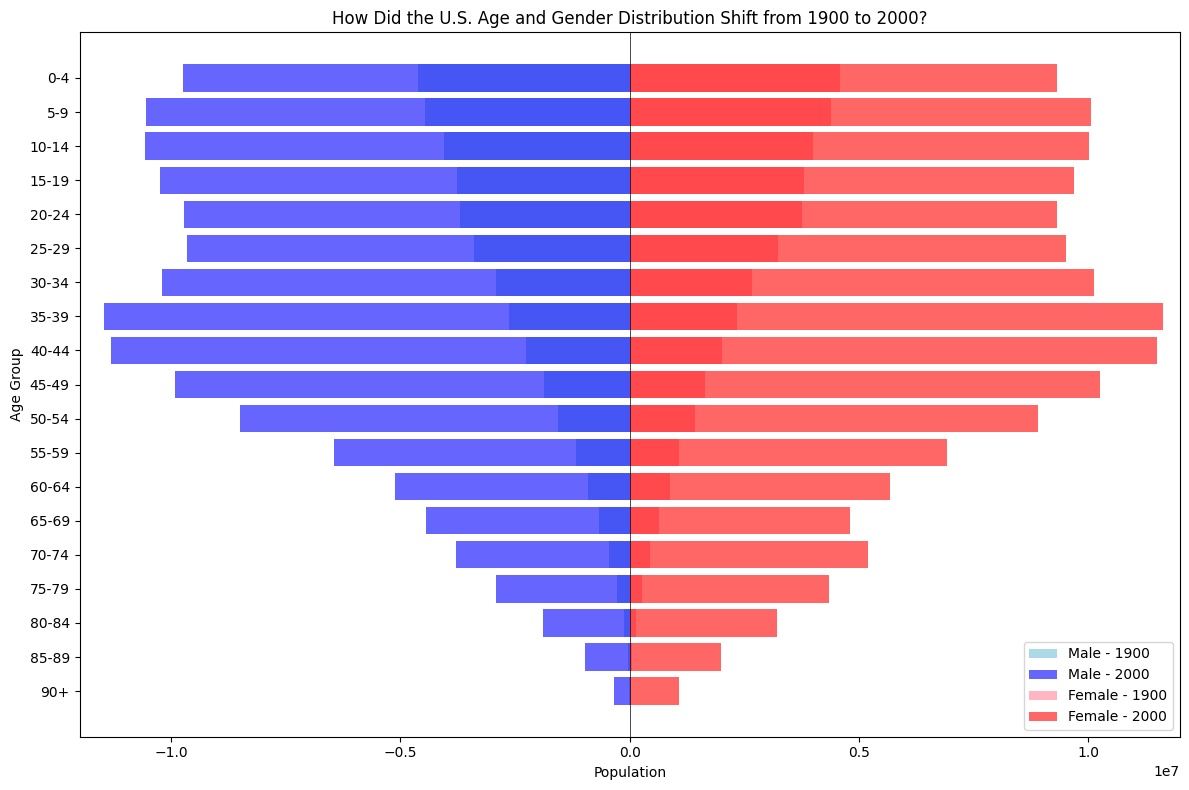

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(males["AgeGroup"], -males[1900], color="lightblue", label="Male - 1900")
ax.barh(males["AgeGroup"], -males[2000], color="blue", alpha=0.6, label="Male - 2000")
ax.barh(females["AgeGroup"], females[1900], color="lightpink", label="Female - 1900")
ax.barh(females["AgeGroup"], females[2000], color="red", alpha=0.6, label="Female - 2000")
# Formatting
ax.set_title("How Did the U.S. Age and Gender Distribution Shift from 1900 to 2000?")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.axvline(0, color='black', linewidth=0.5)
ax.legend(loc="lower right")
ax.set_yticks(range(len(males["AgeGroup"])))
ax.set_yticklabels(males["AgeGroup"])
ax.invert_yaxis()
ax.set_xlim([-1.2e7, 1.2e7])  # Adjust limits as needed

plt.tight_layout()
plt.show()
